# Imports

In [432]:
import json, random
import sys, statistics

In [433]:
from market import Market, Produto

In [434]:
from PIL import Image
from IPython.display import display
import plotly.graph_objects as go

# Static Values

In [435]:
CART: dict = {
    'Altura': 65,
    'Largura': 50,
    'Comprimento': 80,
    'PesoMaximo': 460*1000
}

CART['Capacidade'] = CART['Altura'] * CART['Largura'] * CART['Comprimento']

CART

{'Altura': 65,
 'Largura': 50,
 'Comprimento': 80,
 'PesoMaximo': 460000,
 'Capacidade': 260000}

In [436]:
MAX_MONEY: float = 1350.0
MAX_ITEMS: int = 80
MAX_CARTS: int = 100
MAX_GENERATIONS: int = 1500
BESTS: int = 5

In [437]:
MED_PRICE: float = MAX_MONEY/MAX_ITEMS
f"Preço Médio por Produto: {MED_PRICE:.2f}"

'Preço Médio por Produto: 16.88'

# Funções

In [438]:
m: Market = Market(r"C:\Users\Arklok\Documents\Projetos\gen-algorithm\data\produtos.csv")

In [439]:
def mosaic(cart: list[Produto], row_quantity: int = 5, image_size: tuple[int, int] = (300, 300)) -> None:
    images: list[Image] = [product.show(popup=False).resize(image_size) for product in cart]
    
    mosaic_size: tuple[int, int] = (image_size[0]*row_quantity, image_size[1]*((len(images)//row_quantity)+1))
    
    mosaic: Image = Image.new('RGB', mosaic_size)
    
    for i, image in enumerate(images):
        mosaic.paste(image, (image_size[0]*(i%row_quantity), image_size[1]*(i//row_quantity)))
    
    display(mosaic) 

In [440]:
def plot_generations(data):
    # Extraindo as iterações e os valores
    iterations = list(data.keys())
    max_values = [data[i]['max'] for i in iterations]
    min_values = [data[i]['min'] for i in iterations]
    avg_values = [data[i]['med'] for i in iterations]

    # Criando o gráfico
    fig = go.Figure()

    # Adicionando as linhas para cada tipo
    fig.add_trace(go.Scatter(x=iterations, y=max_values, mode='lines+markers', name='Max'))
    fig.add_trace(go.Scatter(x=iterations, y=min_values, mode='lines+markers', name='Min'))
    fig.add_trace(go.Scatter(x=iterations, y=avg_values, mode='lines+markers', name='Medio'))

    # Adicionando título e rótulos
    fig.update_layout(title='Gráfico de Gerações',
                      xaxis_title='Iteração',
                      yaxis_title='Valores',
                      yaxis_type='log',  # Define o eixo y como logarítmico
                      template='plotly')

    # Exibindo o gráfico
    fig.show()

In [441]:
def calculate_regression(data: dict, last: int = globals()['MAX_GENERATIONS']//5) -> float:
    if len(data) < last:
        return float("inf")
    
    else:
        values: list = list(data.values())[-last:]
        return statistics.stdev([value.get('min') for value in values])

In [442]:
def instanciate(cart: list[int]) -> list[Produto]:
    return [m.get(i) for i in cart]

In [443]:
def info(cart: list[Produto]) -> dict:
    return f"[INFORMAÇÕES DO CARRINHO]\n\
    Preço Total: R${sum([product.price for product in cart]):.2f}\n\
    Peso Total: {sum([product.weight for product in cart])/1000:.2f} g\n\
    Volume Total: {sum([product.volume for product in cart]):.2f} cm³\n\
    Quantidade: {len(cart)}\n\
    Preço médio: R${sum([product.price for product in cart])/len(cart)}\n\n\
    [PRODUTOS]\n\
    Menor preço: R${min([product.price for product in cart])}\n\
    Maior preço: R${max([product.price for product in cart])}\n\
    Menor peso: {min([product.weight for product in cart])}g\n\
    Maior peso: {max([product.weight for product in cart])}g\n\
    Menor volume: {min([product.volume for product in cart])}cm³\n\
    Maior volume: {max([product.volume for product in cart])}cm³\n\n\
    [LISTAGEM]\n{"\n".join([f"{product.name} - R${product.price:.2f} - {product.weight}g - {product.volume}cm³" for product in cart])}"

# Genético

### Geração de Indivíduos

In [444]:
def gerar_carrinho(tamanho: int = globals()['MAX_ITEMS']) -> list[int]:
    compra = []

    while len(compra) < tamanho:
        item: int = m.random()
        compra.append(item)
        
    return compra

In [445]:
c: list[int] = gerar_carrinho()
c

[146522,
 1621455,
 411019,
 335996,
 173742,
 796084,
 146389,
 339051,
 419635,
 86559,
 697131,
 323858,
 461591,
 1127409,
 804252,
 165471,
 1111950,
 1461013,
 236602,
 159064,
 1613589,
 454792,
 174284,
 326267,
 424885,
 461591,
 1600697,
 715821,
 55835,
 27050,
 328762,
 84242,
 1376290,
 463535,
 165494,
 1111943,
 113253,
 454792,
 568622,
 1441479,
 306589,
 55835,
 384522,
 329010,
 30116,
 796083,
 190855,
 127976,
 530631,
 97608,
 169950,
 90515,
 182799,
 409753,
 75455,
 1376370,
 1433060,
 1125858,
 473749,
 460529,
 292195,
 418932,
 292195,
 408426,
 715821,
 43804,
 13627,
 1433060,
 365990,
 146522,
 30116,
 271505,
 1566833,
 340565,
 106757,
 44486,
 409358,
 1433060,
 1538480,
 454792]

### Geração de População Inicial

In [446]:
def gerar_populacao(tamanho: int = globals()['MAX_CARTS']) -> list[list[int]]:
    return [gerar_carrinho() for _ in range(tamanho)]

In [447]:
p: list[list[int]] = gerar_populacao()
p

[[1614082,
  145673,
  302930,
  446660,
  120523,
  434779,
  40815,
  449568,
  133870,
  615918,
  427067,
  58351,
  218078,
  270512,
  697131,
  1387081,
  459333,
  117446,
  328356,
  655414,
  568623,
  270512,
  402459,
  3893,
  568623,
  1619001,
  74949,
  463527,
  344570,
  128337,
  467420,
  137290,
  159064,
  459333,
  1245489,
  1566830,
  174945,
  34660,
  173742,
  120342,
  106757,
  75455,
  568622,
  697132,
  107136,
  9176,
  236619,
  479197,
  328034,
  697134,
  1606864,
  427861,
  697133,
  365762,
  343634,
  131345,
  336102,
  309902,
  1111943,
  455623,
  505570,
  56627,
  13918,
  711969,
  460529,
  1433068,
  439797,
  9498,
  173710,
  1057832,
  1615390,
  348305,
  1615262,
  31117,
  51538,
  70008,
  407910,
  1433060,
  165471,
  106757],
 [62145,
  335996,
  29497,
  461589,
  43804,
  9176,
  588924,
  324326,
  13918,
  427067,
  1433060,
  339743,
  29497,
  334112,
  409358,
  101493,
  113253,
  463526,
  6971,
  172235,
  164065,
 

### Avaliação

In [448]:
# def avaliar(individuo: list[int]) -> float:
#     valor_total: float = 0.0
#     peso_total: float = 0.0
#     volume_total: float = 0.0
#     repeticoes: int = 0
#     categorias_unicas: list = []

#     bonus = 1
#     onus = 1
    
#     pesos = {
#         'essencial': 10, # maior peso
#         'alimentos': 5.5,
#         'açougue': 1.5,
#         'beleza-e-perfumaria': 1,
#         'bebidas': 0.8, 
#         'bebidas-alcoolicas-': 0.5, # menor peso
#         'limpeza': 0.8,
#         'cuidados-pessoais': 0.8 
#     }
    
#     for id in individuo:
#         produto = m.get(id)
#         volume_total+=produto.volume
#         peso_total+=produto.weight
#         valor_total+=produto.price
#         categorias_unicas.append(produto.category)
#         repeticoes+=individuo.count(id)
#         # print(onus)

#     # Ônus
#     onus*= max(1, repeticoes)
#     onus*= max(1, volume_total - globals()['CART']['Capacidade'])
#     onus*= max(1, peso_total - globals()['CART']['PesoMaximo'])
#     onus*= max(1, valor_total - globals()['MAX_MONEY'])

#     # Bônus
#     # bonus*= len(set(categorias_unicas))
#     bonus*= sum([pesos[c]*categorias_unicas.count(c) for c in set(categorias_unicas)])


#     # Cálculo da função de fitness
#     fitness = (
#         valor_total + onus - bonus
#     )
#     return fitness**2  # Mantém a elevação ao quadrado


In [449]:
def avaliar(individuo: list[int]) -> float:
    valor_total: float = 0.0
    peso_total: float = 0.0
    volume_total: float = 0.0
    repeticoes: int = 0
    categorias_unicas: list = []
    
    pesos = {
        'essencial': 2, # maior peso
        'alimentos': 1.5,
        'açougue': 1.2,
        'beleza-e-perfumaria': 1,
        'bebidas': 1, 
        'bebidas-alcoolicas-': 0.7, # menor peso
        'limpeza': 1,
        'cuidados-pessoais': 1 
    }
    
    for id in individuo:
        produto = m.get(id)
        volume_total+=produto.volume
        peso_total+=produto.weight
        valor_total+=produto.price
        categorias_unicas.append(produto.category)
        repeticoes+=individuo.count(id)
        
    # nota = valor_total + volume_total + peso_total
    nota = valor_total**2
    
    # Ônus
    nota*= max(1, valor_total - globals()['MAX_MONEY'])
    nota*= max(1, peso_total - globals()['CART']['PesoMaximo'])
    nota*= max(1, volume_total - globals()['CART']['Capacidade'])
    nota*= max(1, repeticoes - globals()['MAX_ITEMS'])

    # Bônus
    nota/= len(set(categorias_unicas))
    nota/= sum([pesos[c]**categorias_unicas.count(c) for c in set(categorias_unicas)])

    return nota**2  # Mantém a elevação ao quadrado


In [450]:
n: float = avaliar(c)
n

5.9913105665811736e+16

In [451]:
def mapear_notas(populacao: list[list[int]], order: str = 'asc') -> dict[float, list[int]]:
    notas: dict = {avaliar(individuo): individuo for individuo in populacao}
    
    if order == 'asc':
        return dict(sorted(notas.items()))
    
    else:
        return dict(sorted(notas.items(), reverse=True))

In [452]:
nt: dict[float, list[int]] = mapear_notas(p)
nt

{94016650.27127878: [145948,
  137858,
  1591027,
  1111950,
  309625,
  365395,
  1616960,
  1614042,
  1615398,
  473749,
  788816,
  328080,
  37565,
  796083,
  164065,
  180330,
  324197,
  182417,
  339743,
  335996,
  1125858,
  1591040,
  220254,
  125781,
  131661,
  1615390,
  1538480,
  22306,
  81476,
  431979,
  109875,
  323858,
  1591033,
  74215,
  472638,
  273342,
  309902,
  326267,
  55763,
  349738,
  398436,
  40815,
  419635,
  348305,
  13089,
  145358,
  11672,
  1619139,
  6971,
  384522,
  13918,
  409356,
  339035,
  1375886,
  112743,
  106572,
  1566833,
  1055834,
  1433062,
  462115,
  452630,
  339013,
  4700,
  409359,
  221359,
  159064,
  568596,
  804255,
  384522,
  402459,
  424885,
  78635,
  125107,
  145358,
  1619001,
  90515,
  350972,
  102476,
  1461878,
  584617],
 1004580202.2102973: [472091,
  112743,
  29992,
  347653,
  47384,
  180330,
  711969,
  343885,
  334112,
  29497,
  339013,
  467658,
  27050,
  323696,
  419635,
  409358,
  

### Seleção

In [453]:
def torneio(populacao: list[list[int]]) -> list[list[int]]:
    vencedores: list[list[int] | None] = []
    
    while len(vencedores) < 2:
        competidor_1: list[int] = random.choice(populacao)
        competidor_2: list[int] = random.choice(populacao)
                
        # Seleção do melhor individuo:
        if avaliar(competidor_1) < avaliar(competidor_2):
            vencedor: list[int] = competidor_1
        
        elif avaliar(competidor_1) > avaliar(competidor_2):
            vencedor: list[int] = competidor_2
            
        else:
            vencedor: list[int] = random.choice([competidor_1, competidor_2])
            
        if vencedor not in vencedores:
            vencedores.append(vencedor)
    
    return vencedores

In [454]:
v1: list[list[int]] = torneio(p)
v1

[[292195,
  343565,
  444718,
  13204,
  178400,
  336142,
  418932,
  92002,
  12263,
  1614042,
  66453,
  1466989,
  384522,
  1616960,
  182444,
  1614004,
  409283,
  339743,
  454792,
  1461878,
  1477081,
  585414,
  1602897,
  402459,
  78656,
  165471,
  145948,
  655414,
  56627,
  455623,
  462300,
  1433064,
  117446,
  335989,
  173742,
  409359,
  1375784,
  190855,
  273342,
  458691,
  697131,
  236602,
  411008,
  102081,
  97608,
  182417,
  174511,
  454739,
  182417,
  568597,
  283000,
  146522,
  153708,
  1614004,
  796084,
  37565,
  478808,
  478018,
  392461,
  13627,
  1376291,
  105770,
  306328,
  309625,
  152694,
  77655,
  31117,
  697131,
  615918,
  74215,
  1614004,
  169774,
  1616282,
  1376291,
  1613587,
  1376290,
  347653,
  1613312,
  364277,
  323858],
 [690955,
  174284,
  13204,
  27050,
  409356,
  1616281,
  339013,
  568597,
  697131,
  568596,
  395827,
  1619139,
  411008,
  1614082,
  479197,
  340565,
  595320,
  169774,
  1615398,
  

In [455]:
def roleta_viciada(populacao: list[list[int]]) -> list[list[int]]:
    fitness_list: list[float] = [1 / avaliar(individuo) for individuo in populacao]
    total_fitness: float = sum(fitness_list)
    probabilities: list[float] = [fitness / total_fitness for fitness in fitness_list]
    
    vencedores: list[list[int]] = random.choices(populacao, weights=probabilities, k=2)
    
    return vencedores

In [456]:
v2: list[list[int]] = roleta_viciada(p)
v2

[[145948,
  137858,
  1591027,
  1111950,
  309625,
  365395,
  1616960,
  1614042,
  1615398,
  473749,
  788816,
  328080,
  37565,
  796083,
  164065,
  180330,
  324197,
  182417,
  339743,
  335996,
  1125858,
  1591040,
  220254,
  125781,
  131661,
  1615390,
  1538480,
  22306,
  81476,
  431979,
  109875,
  323858,
  1591033,
  74215,
  472638,
  273342,
  309902,
  326267,
  55763,
  349738,
  398436,
  40815,
  419635,
  348305,
  13089,
  145358,
  11672,
  1619139,
  6971,
  384522,
  13918,
  409356,
  339035,
  1375886,
  112743,
  106572,
  1566833,
  1055834,
  1433062,
  462115,
  452630,
  339013,
  4700,
  409359,
  221359,
  159064,
  568596,
  804255,
  384522,
  402459,
  424885,
  78635,
  125107,
  145358,
  1619001,
  90515,
  350972,
  102476,
  1461878,
  584617],
 [472091,
  112743,
  29992,
  347653,
  47384,
  180330,
  711969,
  343885,
  334112,
  29497,
  339013,
  467658,
  27050,
  323696,
  419635,
  409358,
  131661,
  409359,
  54940,
  221360,
  

In [457]:
def eugenia(populacao: list[list[int]], order: str = 'asc') -> list[list[int]]:
    notas: dict[float, list[int]] = mapear_notas(populacao, order)
    melhores: list[list[int]] = list(notas.values())[:globals()['BESTS']]
    
    return melhores

In [458]:
e: list[list[int]] = eugenia(p)
e

[[145948,
  137858,
  1591027,
  1111950,
  309625,
  365395,
  1616960,
  1614042,
  1615398,
  473749,
  788816,
  328080,
  37565,
  796083,
  164065,
  180330,
  324197,
  182417,
  339743,
  335996,
  1125858,
  1591040,
  220254,
  125781,
  131661,
  1615390,
  1538480,
  22306,
  81476,
  431979,
  109875,
  323858,
  1591033,
  74215,
  472638,
  273342,
  309902,
  326267,
  55763,
  349738,
  398436,
  40815,
  419635,
  348305,
  13089,
  145358,
  11672,
  1619139,
  6971,
  384522,
  13918,
  409356,
  339035,
  1375886,
  112743,
  106572,
  1566833,
  1055834,
  1433062,
  462115,
  452630,
  339013,
  4700,
  409359,
  221359,
  159064,
  568596,
  804255,
  384522,
  402459,
  424885,
  78635,
  125107,
  145358,
  1619001,
  90515,
  350972,
  102476,
  1461878,
  584617],
 [472091,
  112743,
  29992,
  347653,
  47384,
  180330,
  711969,
  343885,
  334112,
  29497,
  339013,
  467658,
  27050,
  323696,
  419635,
  409358,
  131661,
  409359,
  54940,
  221360,
  

### Crossover e Mutação

In [459]:
# def cruzamento(pais: list[list[int]], chance: float = 0.05) -> list[list[int]]:
#     pai_1: list[int] = pais[0]
#     pai_2: list[int] = pais[1]

#     probabilidade: float = round(random.uniform(0, 1), 2)

#     if probabilidade < chance:
#         pos: int = random.randint(0, len(pai_1))

#         filho_1: list[int] = pai_1[:pos] + pai_2[pos:]
#         filho_2: list[int] = pai_2[:pos] + pai_1[pos:]

#         return [filho_1, filho_2]

#     else:
#         return [pai_1, pai_2]

In [460]:
def cruzamento(pais: list[list[int]], chance: float = 0.05, num_pontos_corte: int = 1) -> list[list[int]]:
    pai_1: list[int] = pais[0]
    pai_2: list[int] = pais[1]

    probabilidade: float = round(random.uniform(0, 1), 2)

    if probabilidade < chance:
        # Gerando posições de corte aleatórias
        pontos_corte = sorted(random.sample(range(1, len(pai_1)), num_pontos_corte))

        # Criando os filhos a partir dos pontos de corte
        filho_1 = []
        filho_2 = []

        # Inicializando as variáveis para percorrer os pais
        pos_inicio = 0

        for i in range(num_pontos_corte):
            pos_fim = pontos_corte[i]
            filho_1 += pai_1[pos_inicio:pos_fim] if i % 2 == 0 else pai_2[pos_inicio:pos_fim]
            filho_2 += pai_2[pos_inicio:pos_fim] if i % 2 == 0 else pai_1[pos_inicio:pos_fim]
            pos_inicio = pos_fim

        # Adicionando a parte restante do genoma após o último ponto de corte
        filho_1 += pai_1[pos_inicio:]
        filho_2 += pai_2[pos_inicio:]

        return [filho_1, filho_2]

    else:
        return [pai_1, pai_2]

In [461]:
f: list[list[int]] = cruzamento(v1)
f

[[292195,
  343565,
  444718,
  13204,
  178400,
  336142,
  418932,
  92002,
  12263,
  1614042,
  66453,
  1466989,
  384522,
  1616960,
  182444,
  1614004,
  409283,
  339743,
  454792,
  1461878,
  1477081,
  585414,
  1602897,
  402459,
  78656,
  165471,
  145948,
  655414,
  56627,
  455623,
  462300,
  1433064,
  117446,
  335989,
  173742,
  409359,
  1375784,
  190855,
  273342,
  458691,
  697131,
  236602,
  411008,
  102081,
  97608,
  182417,
  174511,
  454739,
  182417,
  568597,
  283000,
  146522,
  153708,
  1614004,
  796084,
  37565,
  478808,
  478018,
  392461,
  13627,
  1376291,
  105770,
  306328,
  309625,
  152694,
  77655,
  31117,
  697131,
  615918,
  74215,
  1614004,
  169774,
  1616282,
  1376291,
  1613587,
  1376290,
  347653,
  1613312,
  364277,
  323858],
 [690955,
  174284,
  13204,
  27050,
  409356,
  1616281,
  339013,
  568597,
  697131,
  568596,
  395827,
  1619139,
  411008,
  1614082,
  479197,
  340565,
  595320,
  169774,
  1615398,
  

In [462]:
def mutar(populacao: list[list[int]], chance = 0.05) -> list[list[int]]: 
    mutados: list[list[int]] = []

    for individuo in populacao:
        for pos, alelo in enumerate(individuo):
            mutacao: float = round(random.uniform(0, 1), 3)

            if mutacao < chance:
                novo_gene: str = m.random(ignore_case=[alelo,]) 
                individuo: str = individuo[:pos] + [novo_gene] + individuo[pos+1:]

        mutados.append(individuo)
    
    return mutados

In [463]:
mt: list[list[Produto]] = mutar(f)
mt

[[292195,
  343565,
  444718,
  13204,
  178400,
  336142,
  418932,
  715822,
  12263,
  1614042,
  479199,
  1466989,
  384522,
  1616960,
  182444,
  1614004,
  409283,
  339743,
  454792,
  1461878,
  1477081,
  585414,
  1602897,
  402459,
  78656,
  165471,
  145948,
  655414,
  56627,
  455623,
  462300,
  1433064,
  117446,
  335989,
  173742,
  409359,
  1375784,
  190855,
  273342,
  458691,
  697131,
  236602,
  411008,
  102081,
  97608,
  182417,
  174511,
  454739,
  182417,
  568597,
  283000,
  146522,
  153708,
  1614004,
  796084,
  37565,
  478808,
  478018,
  392461,
  13627,
  1376291,
  105770,
  306328,
  309625,
  152694,
  77655,
  117446,
  697131,
  1591040,
  74215,
  1614004,
  169774,
  1616282,
  1376291,
  1613587,
  1376290,
  347653,
  1613312,
  364277,
  323858],
 [690955,
  174284,
  13204,
  27050,
  409356,
  1616281,
  339013,
  568597,
  697131,
  568596,
  395827,
  1619139,
  411008,
  1614082,
  479197,
  340565,
  595320,
  169774,
  1615398

# Execução Principal

In [464]:
relatorio: dict[dict[str: float]] = {}

In [465]:
if __name__ == '__main__':
    i: int = 0
    
    populacao_atual: list[list[int]] = gerar_populacao()
    
    while i < MAX_GENERATIONS and calculate_regression(relatorio) >= 1:
        i+=1
        geracao: list[list[int]] = []
        notas: dict[float, list[int]] = mapear_notas(populacao_atual)
        
        while len(geracao) < (MAX_CARTS - BESTS):
            
            pais: list[list[int]] = roleta_viciada(populacao_atual)
            filhos: list[list[int]] = mutar(cruzamento(pais))
            geracao.extend(filhos)
            
        geracao.extend(eugenia(populacao_atual))
        
        relatorio[i] = {'max': max(notas.keys()), 'min': min(notas.keys()), 'med': statistics.median(notas.keys())}
        
        populacao_atual: list[list[int]] = geracao.copy()
        
        sys.stdout.write(f'\rGeração: {i}\n')

Geração: 1
Geração: 2
Geração: 3
Geração: 4
Geração: 5
Geração: 6
Geração: 7
Geração: 8
Geração: 9
Geração: 10
Geração: 11
Geração: 12
Geração: 13
Geração: 14
Geração: 15
Geração: 16
Geração: 17
Geração: 18
Geração: 19
Geração: 20
Geração: 21
Geração: 22
Geração: 23
Geração: 24
Geração: 25
Geração: 26
Geração: 27
Geração: 28
Geração: 29
Geração: 30
Geração: 31
Geração: 32
Geração: 33
Geração: 34
Geração: 35
Geração: 36
Geração: 37
Geração: 38
Geração: 39
Geração: 40
Geração: 41
Geração: 42
Geração: 43
Geração: 44
Geração: 45
Geração: 46
Geração: 47
Geração: 48
Geração: 49
Geração: 50
Geração: 51
Geração: 52
Geração: 53
Geração: 54
Geração: 55
Geração: 56
Geração: 57
Geração: 58
Geração: 59
Geração: 60
Geração: 61
Geração: 62
Geração: 63
Geração: 64
Geração: 65
Geração: 66
Geração: 67
Geração: 68
Geração: 69
Geração: 70
Geração: 71
Geração: 72
Geração: 73
Geração: 74
Geração: 75
Geração: 76
Geração: 77
Geração: 78
Geração: 79
Geração: 80
Geração: 81
Geração: 82
Geração: 83
Geração: 84
G

In [466]:
for gen, data in relatorio.items():
    print(f'Geração: {gen} - {data}')

Geração: 1 - {'max': 7.162600358182484e+17, 'min': 2148066598.7499022, 'med': 3081755848618038.0}
Geração: 2 - {'max': 2044210416192322.2, 'min': 379541479.94331574, 'med': 7834689464.490348}
Geração: 3 - {'max': 363217852784180.1, 'min': 151222636.68708554, 'med': 2366173952.051302}
Geração: 4 - {'max': 40852998346383.32, 'min': 19495011.06286746, 'med': 702995886.2115748}
Geração: 5 - {'max': 24056061227665.49, 'min': 13660930.590865556, 'med': 303867362.5848652}
Geração: 6 - {'max': 24555303482412.65, 'min': 3793898.225038826, 'med': 120418437.89878173}
Geração: 7 - {'max': 251373180135133.97, 'min': 2593782.0323681566, 'med': 43301866.15888931}
Geração: 8 - {'max': 943347890581.0123, 'min': 1013025.9679519978, 'med': 13538901.660910325}
Geração: 9 - {'max': 571944434110.2421, 'min': 436719.74485855416, 'med': 10995644.873168692}
Geração: 10 - {'max': 1884982806424.076, 'min': 182587.06607574652, 'med': 5661983.3138588425}
Geração: 11 - {'max': 224867242469.66757, 'min': 111119.5083

In [467]:
plot_generations(relatorio)

In [468]:
best_individual: list[int] = eugenia(populacao_atual)[0]
best_cart: list[Produto] = instanciate(best_individual)

print(
    f"Geração: {i}\n\
    Melhor nota: {avaliar(best_individual)}\n\
    Valor: {sum([item.price for item in best_cart])}\n\
    Carrinho: {best_cart}\n"
)

Geração: 335
    Melhor nota: 0.001299995963166488
    Valor: 648.08
    Carrinho: [<Produto(id=442458>, <Produto(id=334112>, <Produto(id=1944>, <Produto(id=1433064>, <Produto(id=339645>, <Produto(id=462115>, <Produto(id=160404>, <Produto(id=450942>, <Produto(id=478712>, <Produto(id=34660>, <Produto(id=655414>, <Produto(id=95963>, <Produto(id=5728>, <Produto(id=127976>, <Produto(id=339743>, <Produto(id=794143>, <Produto(id=43804>, <Produto(id=120523>, <Produto(id=164065>, <Produto(id=1591034>, <Produto(id=71969>, <Produto(id=479197>, <Produto(id=1602362>, <Produto(id=595320>, <Produto(id=164887>, <Produto(id=138477>, <Produto(id=324197>, <Produto(id=140452>, <Produto(id=102081>, <Produto(id=327625>, <Produto(id=146389>, <Produto(id=95706>, <Produto(id=174945>, <Produto(id=78635>, <Produto(id=1623448>, <Produto(id=72624>, <Produto(id=125781>, <Produto(id=324113>, <Produto(id=169774>, <Produto(id=273342>, <Produto(id=78656>, <Produto(id=56113>, <Produto(id=1433068>, <Produto(id=5639>, <P

In [469]:
print(info(best_cart))

[INFORMAÇÕES DO CARRINHO]
    Preço Total: R$648.08
    Peso Total: 43.33 g
    Volume Total: 148468.47 cm³
    Quantidade: 80
    Preço médio: R$8.101

    [PRODUTOS]
    Menor preço: R$1.49
    Maior preço: R$28.9
    Menor peso: 1.0g
    Maior peso: 2074.0g
    Menor volume: 1.0cm³
    Maior volume: 18609.625cm³

    [LISTAGEM]
BISC CHOCOBISCUIT AO LEITE 80G - R$7.19 - 96.8g - 466.90000000000003cm³
Requeijão Cremoso Tradicional Catupiry Copo 200g - R$9.99 - 218.0g - 646.2610000000001cm³
Pão de Forma Tradicional Pullman 480g - R$9.99 - 515.0g - 2781.0cm³
Refresco em pó Tang Laranja Docinha 18g - R$1.49 - 20.0g - 72.9cm³
Leite Longa Vida Zero Lactose Semidesnatado TAEQ 1 Litro - R$6.39 - 1065.0g - 1077.44cm³
Suco Del Valle Kapo Sabor Maçã TP 200ML - R$2.69 - 220.0g - 493.92cm³
Hortelã Embalado Unidade - R$4.99 - 72.0g - 1582.425cm³
Cerveja Coronita Pilsen 210ml Long Neck - R$5.19 - 390.0g - 566.0480000000001cm³
Iogurte Natural Desnatado Danone 160g - R$3.59 - 169.0g - 480.9375cm³
Bróc

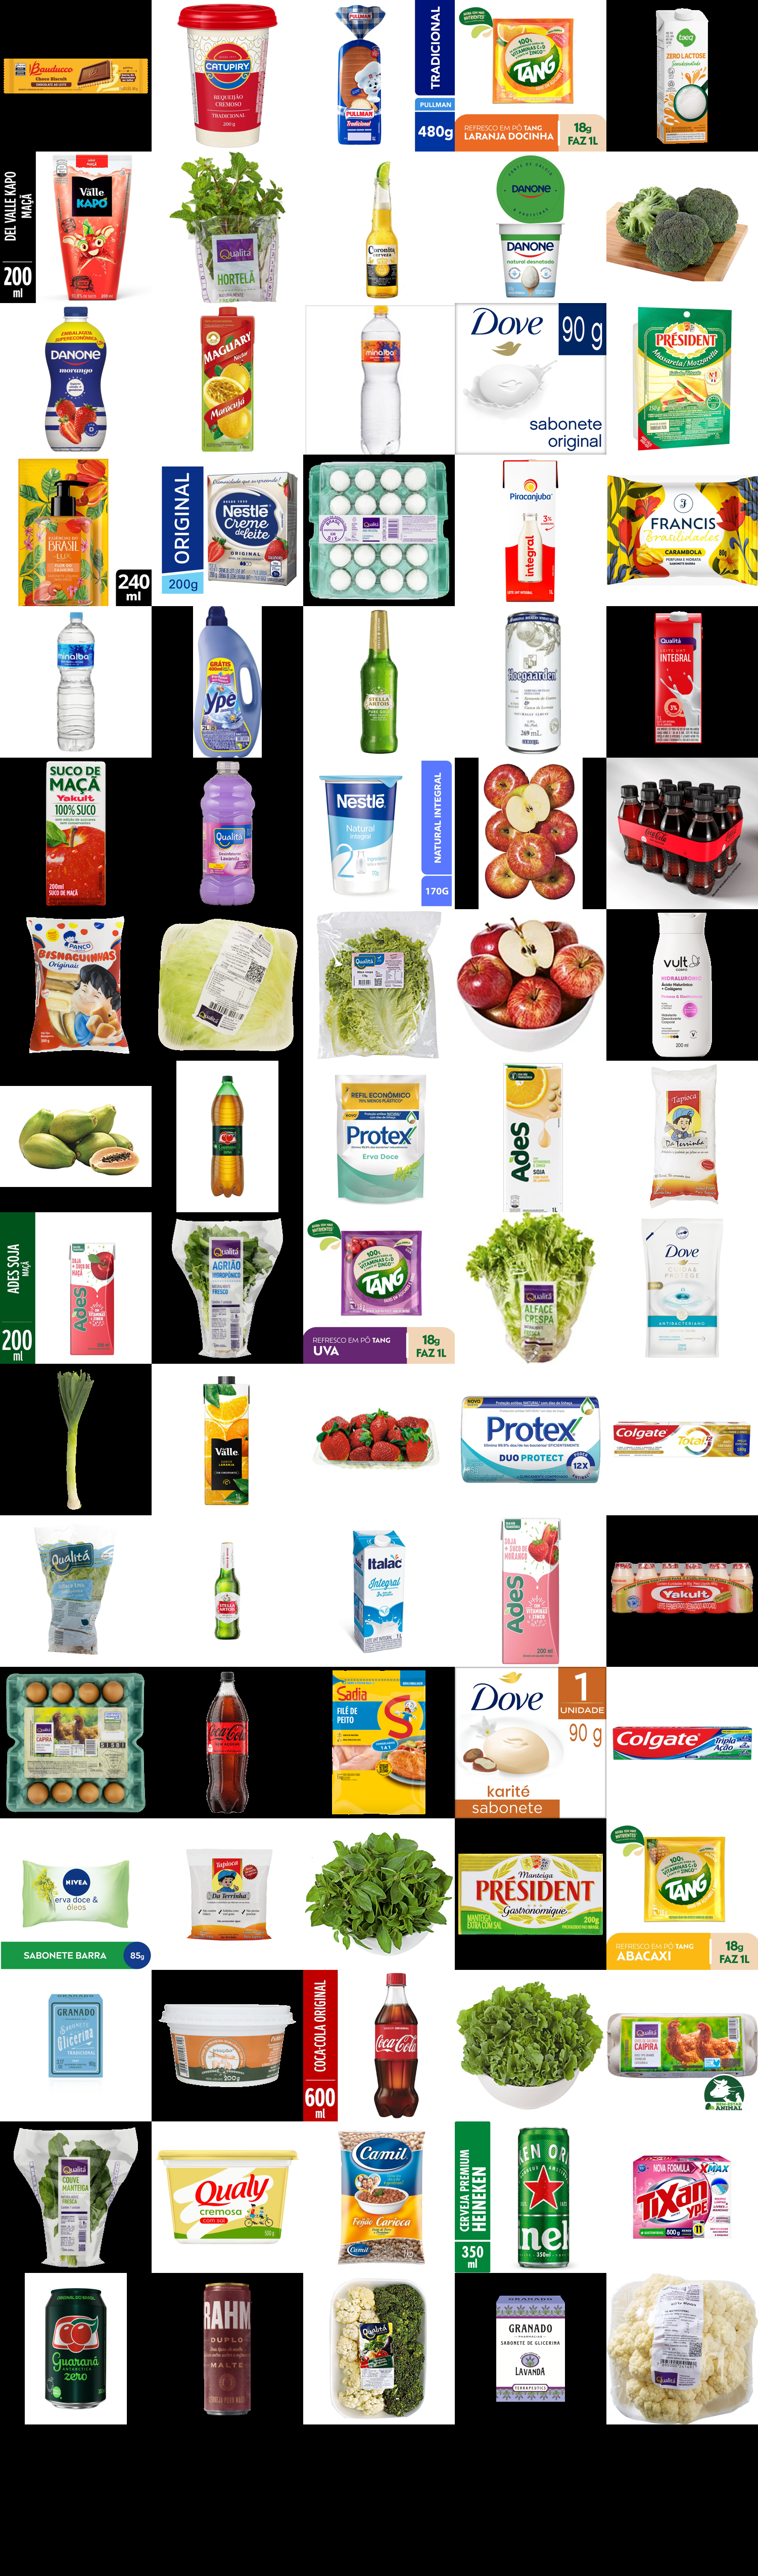

In [470]:
mosaic(best_cart)